<a href="https://colab.research.google.com/github/Vey27/TensorFlow/blob/main/ANNmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import train data

In [2]:
import pandas as pd
df_train = pd.read_csv('mnist_train.csv')
df_train.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(60000, 785)

# import test data

In [24]:
df_test = pd.read_csv("mnist_test.csv")
df_test.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.shape

(10000, 785)

In [8]:
# separate x and y
x = df_train.drop(columns='label').values
y = df_train[['label']]

# normalize/ scale the inputs
x = x/255

x_test =  df_test.drop(columns='label').values
x_test = x_test/255
y_test = df_test[['label']]

y_encoded=pd.get_dummies(y,columns=['label'])

y_test_encoded = pd.get_dummies(y_test,columns=['label'])

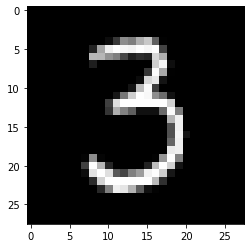

In [7]:
image_no=50
img = df_train.iloc[image_no,1:].values
img = img.reshape(28,28)
plt.imshow(img)
plt.gray()
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [10]:
# define model architecture
model = Sequential()
model.add(Input(shape=(None,784)))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
print(785*256)
print(257*128)

200960
32896


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 256)         200960    
                                                                 
 dense_1 (Dense)             (None, None, 128)         32896     
                                                                 
 dense_2 (Dense)             (None, None, 10)          1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [ ]:

!pip install livelossplot 
from livelossplot import PlotLossesKerasTF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


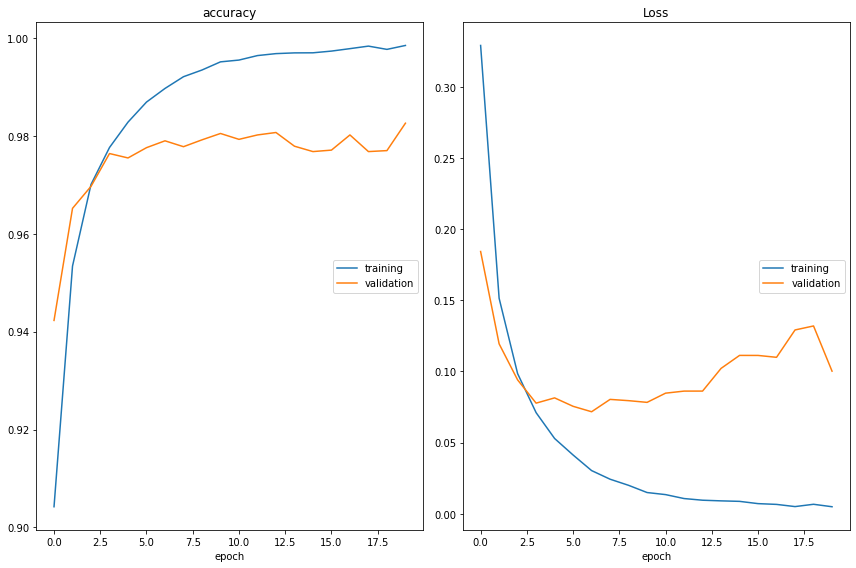

accuracy
	training         	 (min:    0.904, max:    0.998, cur:    0.998)
	validation       	 (min:    0.942, max:    0.983, cur:    0.983)
Loss
	training         	 (min:    0.005, max:    0.329, cur:    0.005)
	validation       	 (min:    0.072, max:    0.184, cur:    0.100)
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1002 - val_accuracy: 0.9826


In [22]:
model.fit(x,y_encoded,epochs=20,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test_encoded))